In [11]:
import argparse
import math
from pathlib import Path
import sys
from datetime import datetime
import os
import shutil
sys.path.append('./taming-transformers')
from IPython import display
from base64 import b64encode
from omegaconf import OmegaConf
from PIL import Image
from PIL.PngImagePlugin import PngInfo
from taming.models import cond_transformer, vqgan
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm
 
import clip
import kornia.augmentation as K
import numpy as np
import imageio
from PIL import ImageFile, Image
import taming
import json
import gc

%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

from vqgan_clip import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
parameters = LatentSpacewalkParameters(
    initial_image=None,
    texts=['a minimalist watercolor painting of a red town'],
     target_images= [],
     seed= None,
     max_iterations= 50,
     learning_rate= 0.2,
     save_interval= 1,
     zoom_interval= None,
     display_interval= 3,
)

In [13]:
parameters.prms

{'texts': ['a minimalist watercolor painting of a red town'],
 'initial_image': None,
 'target_images': [],
 'seed': None,
 'max_iterations': 50,
 'learning_rate': 0.2,
 'save_interval': 1,
 'zoom_interval': None,
 'display_interval': 3,
 'init_weight': 0,
 'init_from_last_saved_image': True}

In [14]:
sw = Spacewalker(parameters=parameters, width=50, height=50)

saved 20210823-180107_662441-9d17e-2e05e2 to s3://algorithmic-ink/current_nft_id
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from /home/naka/code/side/taming-transformers/taming/models/vqgan_imagenet_f16_16384.ckpt


In [15]:
empty_ram()

i: 0, loss: 0.983403, losses: 0.983403


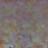

RuntimeError: CUDA error: CUBLAS_STATUS_ALLOC_FAILED when calling `cublasCreate(handle)`

In [16]:
sw.run(parameters=parameters)